

# Covid-19 en Madrid. Incidencia por Zonas 

In [1]:
import numpy as np
from utils.helper import loadCovidData, filterCovidData, loadPopulationData, loadResData, loadAgeData, mergeData
from utils.helper import comparePlaces, plotPlaces, showPopulationAgeProfile, scatterPlaces
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Carga de datos de la fuente oficial

In [3]:
#!wget https://datos.comunidad.madrid/catalogo/dataset/7da43feb-8d4d-47e0-abd5-3d022d29d09e/resource/b2a3a3f9-1f82-42c2-89c7-cbd3ef801412/download/covid19_tia_muni_y_distritos.csv --no-check-certificat -O datasets/covid19_tia_muni_y_distritos.csv

In [4]:
df = loadCovidData()

## Lista de municipios y distritos a observar

In [5]:
madrid_places = df[df['municipio_distrito'].str.startswith('Madrid')]['municipio_distrito'].unique()
loc_places = np.array(['Getafe','Leganés','Fuenlabrada','Alcorcón','Móstoles','Parla',
                       'Alcalá de Henares','Torrejón de Ardoz','Coslada',
                       'Pozuelo de Alarcón','Majadahonda','Las Rozas de Madrid','Collado Villalba'])
places = np.concatenate([madrid_places, loc_places])

### Indicencia total ordenada por zona

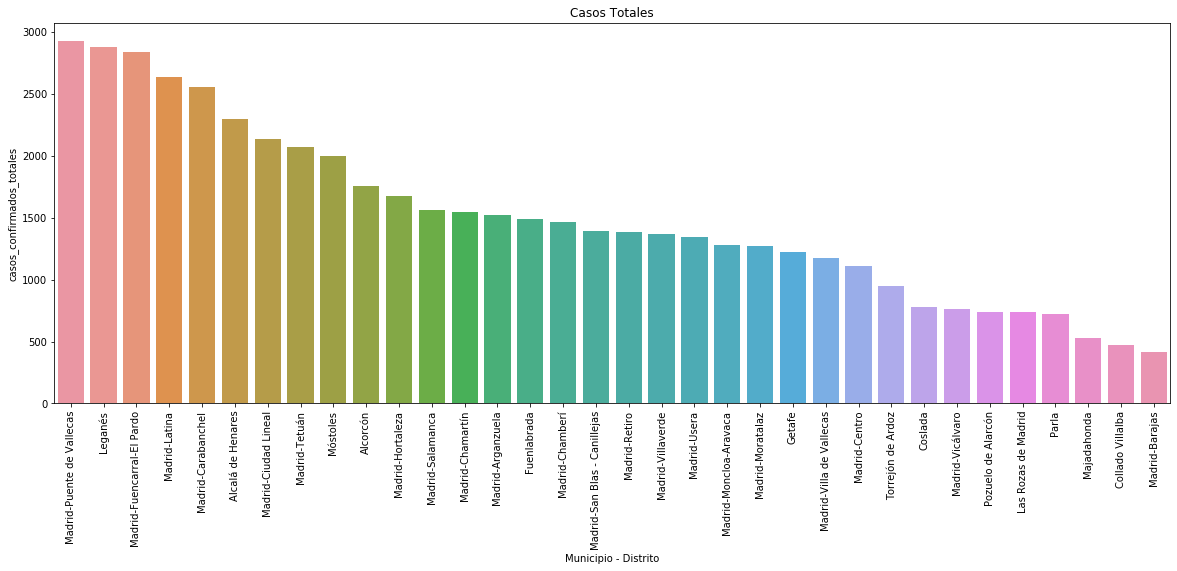

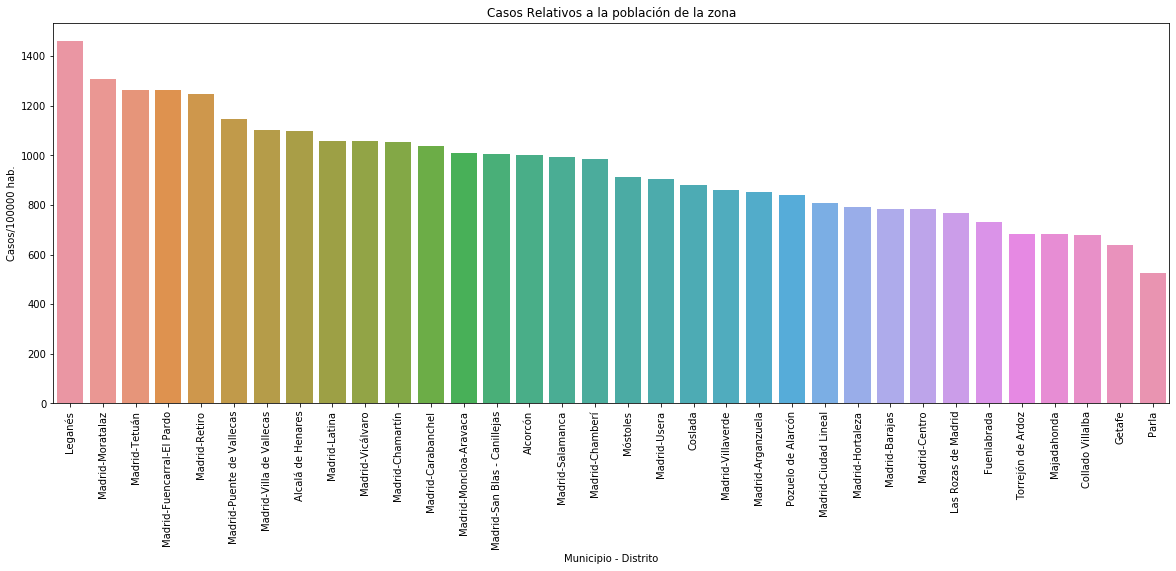

In [6]:
comparePlaces(df,places)

### Evolución de casos detectados por día por zona 

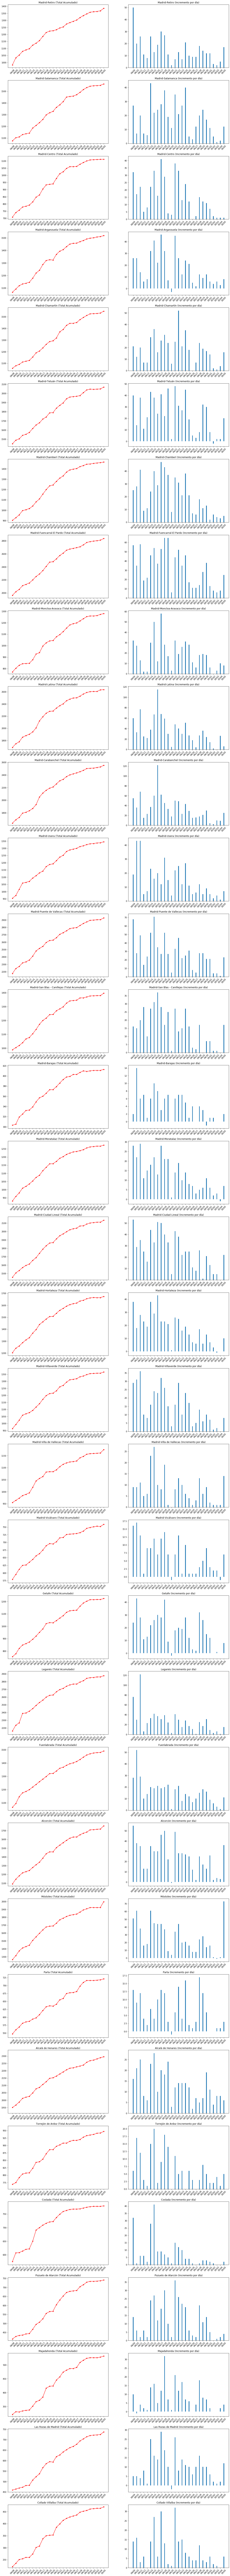

In [18]:
plotPlaces(df,places,agg_factor=1)

## Peso de la edad de la población en la incidencia

Realizaremos una serie de visualizaciones para observar el peso de la edad de la población en la incidencia de Covid-19 las zonas seleccionadas anteriormente:

### Carga de datos adicionales y combinación

In [8]:
# Filtramos para quedarnos con los últimos datos de la serie
df_covid = filterCovidData(df)
# Número de habitantes por municipio distrito
df_pop = loadPopulationData()
# Número de plazas de residencia en cada municipio (No se incluyen los distritos de Madrid)
df_res = loadResData()
# Número de censados agrupados por edad y agregado de mayores de los años que indique el parámetro 'age_th'
age_th=70
df_age_profile, df_age_th = loadAgeData(age_th)

A continuación uniremos estos datos en una única tabla:

In [9]:
df_completed = mergeData(df_covid, df_pop, df_res, df_age_th)

Filtramos por los lugares con mas de cierto número de habitantes: 

In [10]:
df_completed_cities=df_completed[df_completed['habitantes'] > 50000]

### Observación de la Incidencia Vs unidades relativas en relación con la edad

Tasa de incidencia acumulada / 100.000 habitantes Vs Plazas de residencias en el municipio / 1000 habitantes:

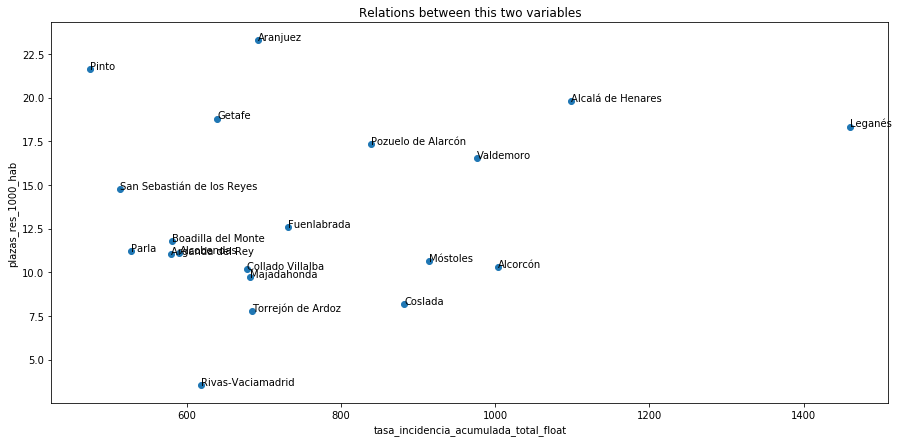

In [11]:
scatterPlaces(df_completed_cities,'tasa_incidencia_acumulada_total_float','plazas_res_1000_hab')

Tasa de incidencia acumulada / 100.000 habitantes Vs Porcentaje de población por encima de la edad señalada en "age_th": 

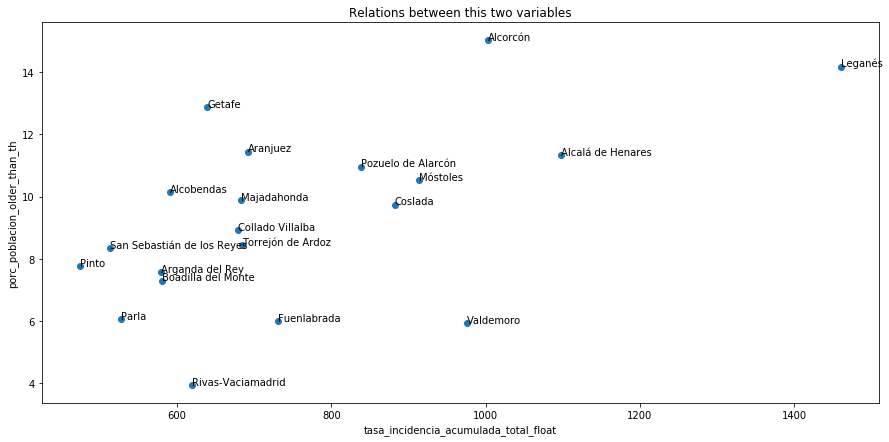

In [12]:
scatterPlaces(df_completed_cities,'tasa_incidencia_acumulada_total_float','porc_poblacion_older_than_th')

### Conclusión

Atendiendo especialmente a la segunda gráfica parece que puede haber una cierta relación entre incidencia y edad.

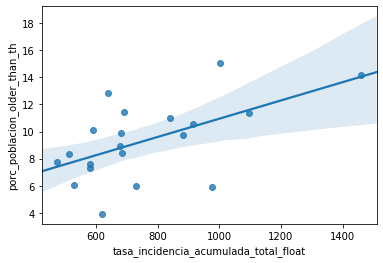

In [13]:
scatterPlaces(df_completed_cities,'tasa_incidencia_acumulada_total_float','porc_poblacion_older_than_th',reg=True)

No obstante no parece ser determinante si atendemos a casos anómalos como los siguientes:
* Rivas, Parla y Valdemoro: Con un volumen de casos intermedio para una población jovén, especialmente Fuenlabrada
* Getafe y Alcorcón con un numero de casos reletivamente bajo, especialmente Getafe para una población con un perfil de edad de la población parecida a la lugares con alta incidencia, como Leganés y Alcalá.

De hecho, observese el perfil poblacional de estos 2 municipios, en ellos la incidencia es muy dispar, mientras que el perfil es bastante parecido. Siendo además los municipios con mayor número de plazas en residencias:

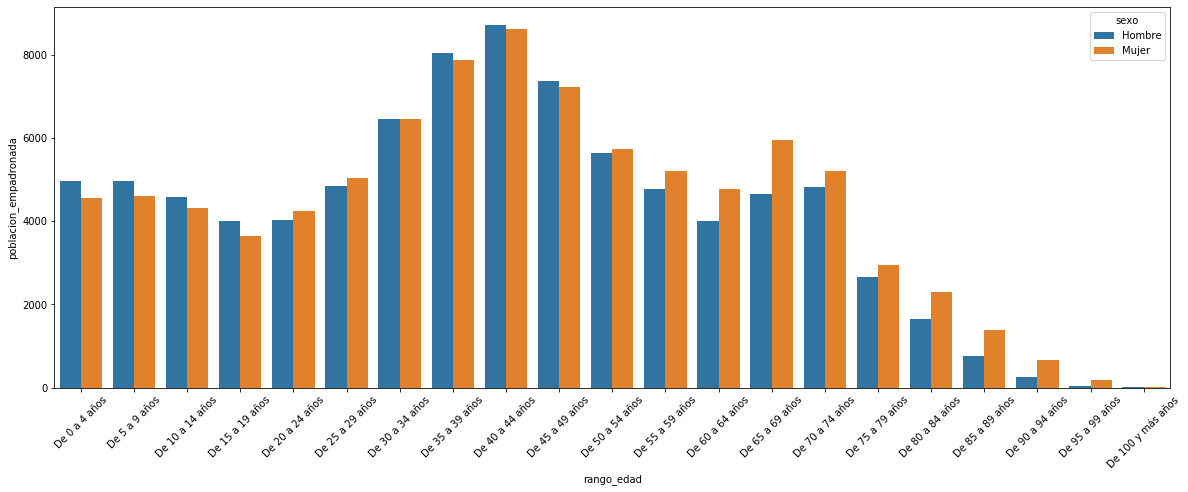

In [14]:
showPopulationAgeProfile(df_age_profile,'Getafe')

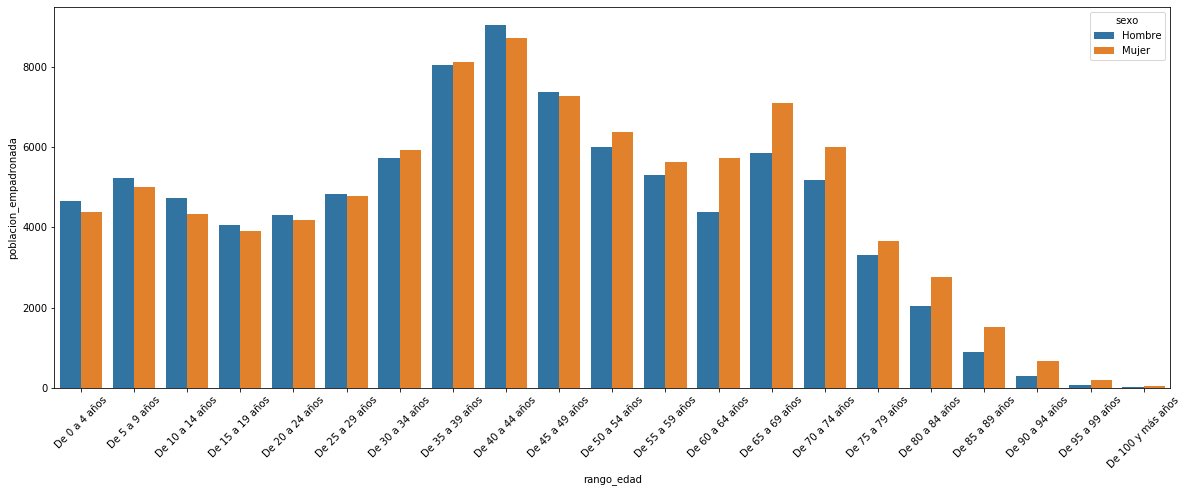

In [15]:
showPopulationAgeProfile(df_age_profile,'Leganés')

Conclusión, La incidencia depende, además de la edad, de otros factores que habrá que seguir investigando. 

# Fin de la visualización